<a href="https://colab.research.google.com/github/PDP1004/ANN_Face1/blob/main/ANN_NhanDangKhuonMat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mục mới

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import glob
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
training_set=train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/FACE1/train/train',target_size=(150,150), batch_size=40, class_mode='categorical')
validation_set=validation.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/FACE1/train/validation',target_size=(150,150), batch_size=40, class_mode='categorical')

Found 123 images belonging to 2 classes.
Found 123 images belonging to 2 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'KHONGPHAIPHONG': 0, 'PHONG': 1}

In [ ]:
x_train,y_train=next(training_set)
x_train.shape, y_train.shape

x_test,y_test=next(validation_set)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((40, 150, 150, 3), (40, 2), (40, 150, 150, 3), (40, 2))

In [ ]:
x_train=x_train.reshape(40,67500)
x_test=x_test.reshape(40,67500)
x_train=x_train.astype ('float32')
x_test=x_test.astype ('float32')
x_train.shape, y_train.shape

((40, 67500), (40, 2))

In [ ]:
#Tạo Model
model = Sequential()

model.add(Dense(16,activation='relu',input_shape=(67500,)))

model.add(Dense(32,activation='relu',input_shape=(67500,)))

model.add(Dense(64,activation='relu',input_shape=(67500,)))

model.add(Dense(128,activation='relu',input_shape=(67500,)))

model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                1080016   
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 2)                 258       
                                                                 
Total params: 1,091,250
Trainable params: 1,091,250
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',  metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(x_train, y_train, epochs = 200, verbose=1, batch_size=1, validation_data= (x_test, y_test), 
                    validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=100)])

Epoch 1/200
32/32 [==============================] - 3s 9ms/step - loss: 1.8986 - accuracy: 0.6875 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 2/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 4.1276e-06 - val_accuracy: 1.0000
Epoch 3/200
32/32 [==============================] - 0s 4ms/step - loss: 4.5271e-04 - accuracy: 1.0000 - val_loss: 2.6226e-06 - val_accuracy: 1.0000
Epoch 4/200
32/32 [==============================] - 0s 4ms/step - loss: 5.6983e-05 - accuracy: 1.0000 - val_loss: 2.8759e-06 - val_accuracy: 1.0000
Epoch 5/200
32/32 [==============================] - 0s 5ms/step - loss: 1.0806e-05 - accuracy: 1.0000 - val_loss: 1.3411e-07 - val_accuracy: 1.0000
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 2.4065e-06 - accuracy: 1.0000 - val_loss: 1.4901e-08 - val_accuracy: 1.0000
Epoch 7/200
32/32 [==============================] - 0s 4ms/step - loss: 2.5704e-07 - accuracy: 1.0000 - val_loss: 0.0

In [ ]:
model.save('model_save/ANN_Face.h5')

Sai số kiểm tra là:  0.0
Độ chính xác kiểm tra là:  1.0


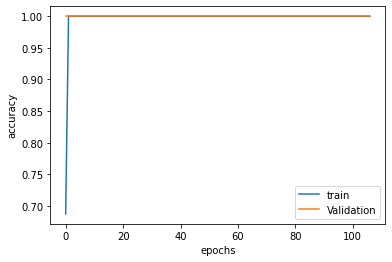

In [ ]:
score = model.evaluate(x_test, y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from keras.models import load_model
ANN_Face = load_model('/content/model_save/ANN_Face.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


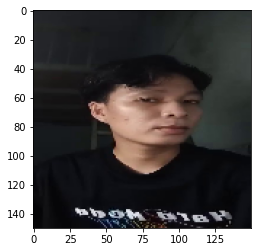

In [ ]:
# img_path = '/content/drive/MyDrive/Colab Notebooks/FACE1/test/khongphaiphong/quang_00.jpg'
img_path = '/content/drive/MyDrive/Colab Notebooks/FACE1/test/laphong/phong_03.jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,67500)
img=img.astype('float32')
img=img/255
pre = np.argmax(ANN_Face.predict(img),axis=1)
pred = model.predict(img)

classes = ['KHÔNG PHẢI PHONG','LÀ PHONG']

In [ ]:
print(np.argmax(pred))
if pre == 0:
  print(classes[0])
else: print(classes[1])

1
LÀ PHONG
